In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np

player_count_df = pd.read_excel("./output/seasonal_player_counts.xlsx").set_index(
    "season"
)
start_stop_df = pd.read_excel("./data/season_start_stop.xlsx").set_index("season")
start_stop_df["length"] = start_stop_df["stop"] - start_stop_df["start"]
start_stop_df["length"] = start_stop_df["length"].apply(
    lambda x: x.days
)  # convert time delta to int in days

seasonal_stats_df = (
    pd.read_excel("./output/seasonal_stats.xlsx")
    .drop(columns=["Unnamed: 0"])
    .set_index("season")
)

diversity_df = pd.read_excel("./output/seasonal_diversity_of_nations.xlsx").set_index(
    "season"
)

<IPython.core.display.Javascript object>

In [2]:
merged_df = pd.merge(
    player_count_df, start_stop_df, how="inner", left_index=True, right_index=True
)
merged_df = pd.merge(
    merged_df, seasonal_stats_df, how="inner", left_index=True, right_index=True
)
merged_df = pd.merge(
    merged_df, diversity_df, how="inner", left_index=True, right_index=True
)
merged_df

,players_found,players_total,players_captured,extra_players_captured,start,stop,version,comment,comment_2,length,min_mmr,max_mmr,num_matches,top500_cutoff,top200_cutoff,top64_cutoff,richness,shannon_diversity,dominance,simpson
season,,,,,,,,,,,,,,,,,,,,
M2_01 Wolf 2020,2905,2997,96.930264,32.846715,2020-01-08,2020-02-04,5.0,Release Merchants of Ofir,Merchant of Ofir was released before this season,27,2407,10484,699496,9749,9872,10061,79,2.911451,0.109716,0.890284
M2_02 Love 2020,3984,4883,81.589187,55.561048,2020-02-04,2020-03-03,5.1,Balance patch,NaN,28,7776,10537,769172,9832,9952,10117,73,2.784907,0.124585,0.875415
M2_03 Bear 2020,4772,6632,71.954162,50.689290,2020-03-03,2020-04-02,5.2/5.2.9/6.0,Balance patch,The Android release happend the end of the season,30,9427,10669,862283,9867,9995,10204,74,2.770397,0.123829,0.876171
M2_04 Elf 2020,6070,10209,59.457342,43.679412,2020-04-02,2020-05-05,6.1,New Leader Abilities & Start Geralt Journey,"Hidden Cache, ...",33,9666,10751,1004603,9952,10087,10293,78,2.921609,0.105208,0.894792
M2_05 Viper 2020,5977,10079,59.301518,43.177725,2020-05-05,2020-06-02,6.2,Balance patch,NaN,28,9635,10622,859640,9910,10028,10255,82,2.975021,0.106955,0.893045
M2_06 Magic 2020,6104,9919,61.538462,45.955518,2020-06-02,2020-06-30,6.3,Bug Fixes only,NaN,28,9624,10597,793013,9896,10002,10191,79,3.028216,0.100404,0.899596
M2_07 Griffin 2020,7372,14791,49.841120,37.817450,2020-06-30,2020-08-04,7.0,Release Master Mirror,NaN,35,9698,10667,996516,9978,10100,10289,80,3.085621,0.092351,0.907649
M2_08 Draconid 2020,7037,13800,50.992754,38.180987,2020-08-04,2020-09-01,7.1,Start Ciri Journey,NaN,28,9666,10546,837545,9946,10061,10246,83,3.043551,0.097257,0.902743
M2_09 Dryad 2020,7056,14554,48.481517,35.881649,2020-09-01,2020-10-01,7.2,Overhaul leader abilities,"Removal of Second Wind, Call to Harmony, ... I...",30,9678,10725,854593,9946,10046,10183,83,3.071002,0.093658,0.906342


<IPython.core.display.Javascript object>

In [3]:
merged_df["pro_players_per_day"] = (merged_df["players_total"] - 500) / merged_df[
    "length"
]
merged_df["top2860_matches_per_day"] = (merged_df["num_matches"] - 500) / merged_df[
    "length"
]

<IPython.core.display.Javascript object>

In [4]:
merged_df

,players_found,players_total,players_captured,extra_players_captured,start,stop,version,comment,comment_2,length,...,num_matches,top500_cutoff,top200_cutoff,top64_cutoff,richness,shannon_diversity,dominance,simpson,pro_players_per_day,top2860_matches_per_day
season,,,,,,,,,,,,,,,,,,,,,
M2_01 Wolf 2020,2905,2997,96.930264,32.846715,2020-01-08,2020-02-04,5.0,Release Merchants of Ofir,Merchant of Ofir was released before this season,27,...,699496,9749,9872,10061,79,2.911451,0.109716,0.890284,92.481481,25888.740741
M2_02 Love 2020,3984,4883,81.589187,55.561048,2020-02-04,2020-03-03,5.1,Balance patch,NaN,28,...,769172,9832,9952,10117,73,2.784907,0.124585,0.875415,156.535714,27452.571429
M2_03 Bear 2020,4772,6632,71.954162,50.689290,2020-03-03,2020-04-02,5.2/5.2.9/6.0,Balance patch,The Android release happend the end of the season,30,...,862283,9867,9995,10204,74,2.770397,0.123829,0.876171,204.400000,28726.100000
M2_04 Elf 2020,6070,10209,59.457342,43.679412,2020-04-02,2020-05-05,6.1,New Leader Abilities & Start Geralt Journey,"Hidden Cache, ...",33,...,1004603,9952,10087,10293,78,2.921609,0.105208,0.894792,294.212121,30427.363636
M2_05 Viper 2020,5977,10079,59.301518,43.177725,2020-05-05,2020-06-02,6.2,Balance patch,NaN,28,...,859640,9910,10028,10255,82,2.975021,0.106955,0.893045,342.107143,30683.571429
M2_06 Magic 2020,6104,9919,61.538462,45.955518,2020-06-02,2020-06-30,6.3,Bug Fixes only,NaN,28,...,793013,9896,10002,10191,79,3.028216,0.100404,0.899596,336.392857,28304.035714
M2_07 Griffin 2020,7372,14791,49.841120,37.817450,2020-06-30,2020-08-04,7.0,Release Master Mirror,NaN,35,...,996516,9978,10100,10289,80,3.085621,0.092351,0.907649,408.314286,28457.600000
M2_08 Draconid 2020,7037,13800,50.992754,38.180987,2020-08-04,2020-09-01,7.1,Start Ciri Journey,NaN,28,...,837545,9946,10061,10246,83,3.043551,0.097257,0.902743,475.000000,29894.464286
M2_09 Dryad 2020,7056,14554,48.481517,35.881649,2020-09-01,2020-10-01,7.2,Overhaul leader abilities,"Removal of Second Wind, Call to Harmony, ... I...",30,...,854593,9946,10046,10183,83,3.071002,0.093658,0.906342,468.466667,28469.766667


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='start', ylabel='pro_players_per_day'>

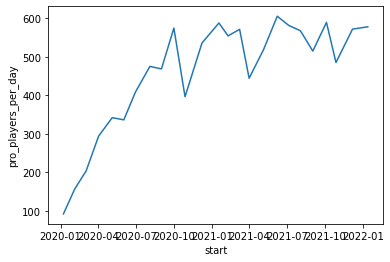

<IPython.core.display.Javascript object>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=merged_df, x="start", y="pro_players_per_day")

In [6]:
merged_df["season_readable"] = [
    " ".join(x.split()[1:]) for x in merged_df.reset_index()["season"]
]
merged_df.to_excel("./output/seasonal_popularity.xlsx")
merged_df

,players_found,players_total,players_captured,extra_players_captured,start,stop,version,comment,comment_2,length,...,top500_cutoff,top200_cutoff,top64_cutoff,richness,shannon_diversity,dominance,simpson,pro_players_per_day,top2860_matches_per_day,season_readable
season,,,,,,,,,,,,,,,,,,,,,
M2_01 Wolf 2020,2905,2997,96.930264,32.846715,2020-01-08,2020-02-04,5.0,Release Merchants of Ofir,Merchant of Ofir was released before this season,27,...,9749,9872,10061,79,2.911451,0.109716,0.890284,92.481481,25888.740741,Wolf 2020
M2_02 Love 2020,3984,4883,81.589187,55.561048,2020-02-04,2020-03-03,5.1,Balance patch,NaN,28,...,9832,9952,10117,73,2.784907,0.124585,0.875415,156.535714,27452.571429,Love 2020
M2_03 Bear 2020,4772,6632,71.954162,50.689290,2020-03-03,2020-04-02,5.2/5.2.9/6.0,Balance patch,The Android release happend the end of the season,30,...,9867,9995,10204,74,2.770397,0.123829,0.876171,204.400000,28726.100000,Bear 2020
M2_04 Elf 2020,6070,10209,59.457342,43.679412,2020-04-02,2020-05-05,6.1,New Leader Abilities & Start Geralt Journey,"Hidden Cache, ...",33,...,9952,10087,10293,78,2.921609,0.105208,0.894792,294.212121,30427.363636,Elf 2020
M2_05 Viper 2020,5977,10079,59.301518,43.177725,2020-05-05,2020-06-02,6.2,Balance patch,NaN,28,...,9910,10028,10255,82,2.975021,0.106955,0.893045,342.107143,30683.571429,Viper 2020
M2_06 Magic 2020,6104,9919,61.538462,45.955518,2020-06-02,2020-06-30,6.3,Bug Fixes only,NaN,28,...,9896,10002,10191,79,3.028216,0.100404,0.899596,336.392857,28304.035714,Magic 2020
M2_07 Griffin 2020,7372,14791,49.841120,37.817450,2020-06-30,2020-08-04,7.0,Release Master Mirror,NaN,35,...,9978,10100,10289,80,3.085621,0.092351,0.907649,408.314286,28457.600000,Griffin 2020
M2_08 Draconid 2020,7037,13800,50.992754,38.180987,2020-08-04,2020-09-01,7.1,Start Ciri Journey,NaN,28,...,9946,10061,10246,83,3.043551,0.097257,0.902743,475.000000,29894.464286,Draconid 2020
M2_09 Dryad 2020,7056,14554,48.481517,35.881649,2020-09-01,2020-10-01,7.2,Overhaul leader abilities,"Removal of Second Wind, Call to Harmony, ... I...",30,...,9946,10046,10183,83,3.071002,0.093658,0.906342,468.466667,28469.766667,Dryad 2020


<IPython.core.display.Javascript object>

In [7]:
merged_df["series"] = [
    x.split("_")[0].replace("M", "Masters 0") for x in merged_df.index
]

<IPython.core.display.Javascript object>

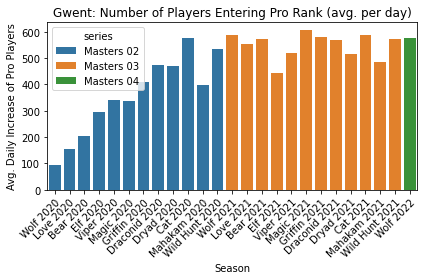

<IPython.core.display.Javascript object>

In [8]:
sns.barplot(
    data=merged_df,
    x="season_readable",
    y="pro_players_per_day",
    hue="series",
    dodge=False,
)

plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.xlabel("Season")
plt.ylabel("Avg. Daily Increase of Pro Players")
plt.title("Gwent: Number of Players Entering Pro Rank (avg. per day)")
plt.tight_layout()
plt.savefig("./images/popularity_plot.png", dpi=300)
plt.show()

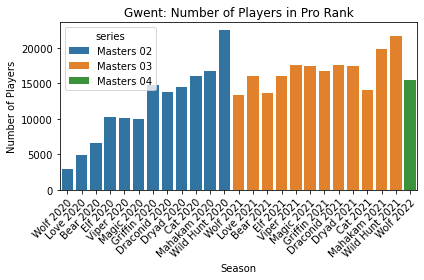

<IPython.core.display.Javascript object>

In [9]:
sns.barplot(
    data=merged_df, x="season_readable", y="players_total", hue="series", dodge=False,
)

plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.xlabel("Season")
plt.ylabel("Number of Players")
plt.title("Gwent: Number of Players in Pro Rank")
plt.tight_layout()
plt.savefig("./images/player_count_plot.png", dpi=300)
plt.show()

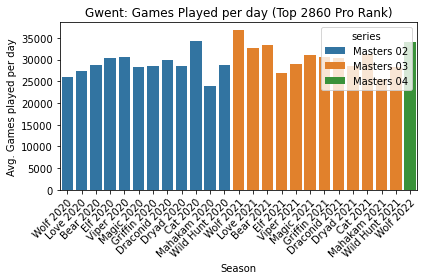

<IPython.core.display.Javascript object>

In [10]:
sns.barplot(
    data=merged_df,
    x="season_readable",
    y="top2860_matches_per_day",
    hue="series",
    dodge=False,
)

plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.xlabel("Season")
plt.ylabel("Avg. Games played per day")
plt.title("Gwent: Games Played per day (Top 2860 Pro Rank)")
plt.tight_layout()
plt.savefig("./images/daily_games_plot.png", dpi=300)
plt.show()

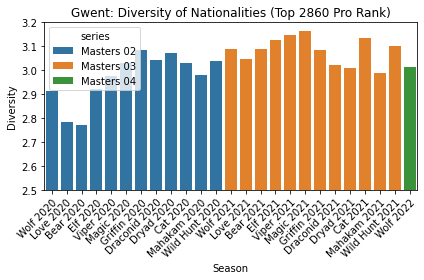

<IPython.core.display.Javascript object>

In [11]:
sns.barplot(
    data=merged_df,
    x="season_readable",
    y="shannon_diversity",
    hue="series",
    dodge=False,
)

plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.xlabel("Season")
plt.ylabel("Diversity")
plt.ylim(ymax=3.2, ymin=2.5)
plt.title("Gwent: Diversity of Nationalities (Top 2860 Pro Rank)")
plt.tight_layout()
plt.savefig("./images/diversity_per_season.png", dpi=300)
plt.show()

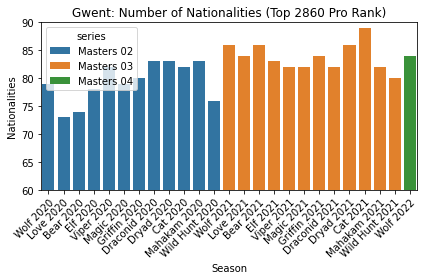

<IPython.core.display.Javascript object>

In [12]:
sns.barplot(
    data=merged_df, x="season_readable", y="richness", hue="series", dodge=False,
)

plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.xlabel("Season")
plt.ylabel("Nationalities")
plt.ylim(ymax=90, ymin=60)
plt.title("Gwent: Number of Nationalities (Top 2860 Pro Rank)")
plt.tight_layout()
plt.savefig("./images/number_of_nationalities_per_season.png", dpi=300)
plt.show()